In [122]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

### Exploration

In [75]:
df = pd.read_csv('../../data/feature_store/data_with_new_features.csv')

In [76]:
df.sample(5)

,ID,age,experience,income,zip_code,family,cc_avg,education,mortgage,personal_loan,...,online,credit_card,age_bracket,age_bracket_name,income_per_family_member,cc_to_income_ratio,debt_to_income_ratio,financial_maturity_index,experience_bracket,education_degree
4635,4736,34,9,84,94707,4,2.2,2,323,0,...,1,0,2,Millennials,16.800000,0.026190,3.871429,38.181818,1,college
1103,1122,30,6,49,91330,3,0.7,2,196,0,...,0,1,2,Millennials,12.250000,0.014286,4.014286,70.000000,1,college
2713,2774,63,37,185,94309,2,7.9,2,358,1,...,1,0,4,Baby boomers,61.666667,0.042703,1.977838,23.417722,3,college
426,435,30,6,45,95819,1,1.8,2,0,0,...,1,0,2,Millennials,22.500000,0.040000,0.040000,25.000000,1,college
204,208,34,10,71,94115,4,0.1,2,0,0,...,0,0,2,Millennials,14.200000,0.001408,0.001408,710.000000,2,college


In [82]:
numerical = ['age', 'experience', 'income', 'family', 'mortgage', 'cc_avg']

categorical = ['age_bracket_name', 'personal_loan', 'education_degree', 
               'securities_account', 'cd_account', 'online', 'credit_card']

df_numerical = df[numerical].copy()
df_categorical = df[categorical].copy()

In [83]:
df_numerical

,age,experience,income,family,mortgage,cc_avg
0,25,1,49,4,0,1.6
1,45,19,34,3,0,1.5
2,39,15,11,1,0,1.0
3,35,9,100,1,0,2.7
4,35,8,45,4,0,1.0
...,...,...,...,...,...,...
4889,29,3,40,1,0,1.9
4890,30,4,15,4,85,0.4
4891,63,39,24,2,0,0.3
4892,65,40,49,3,0,0.5


In [84]:
df_categorical

,age_bracket_name,personal_loan,education_degree,securities_account,cd_account,online,credit_card
0,Generation Z,0,high school,1,0,0,0
1,Generation X,0,high school,1,0,0,0
2,Millennials,0,high school,0,0,0,0
3,Millennials,0,college,0,0,0,0
4,Millennials,0,college,0,0,0,1
...,...,...,...,...,...,...,...
4889,Millennials,0,postgraduate,0,0,1,0
4890,Millennials,0,high school,0,0,1,0
4891,Baby boomers,0,postgraduate,0,0,0,0
4892,Baby boomers,0,college,0,0,1,0


In [86]:
df_numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4894 entries, 0 to 4893
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         4894 non-null   int64  
 1   experience  4894 non-null   int64  
 2   income      4894 non-null   int64  
 3   family      4894 non-null   int64  
 4   mortgage    4894 non-null   int64  
 5   cc_avg      4894 non-null   float64
dtypes: float64(1), int64(5)
memory usage: 229.5 KB


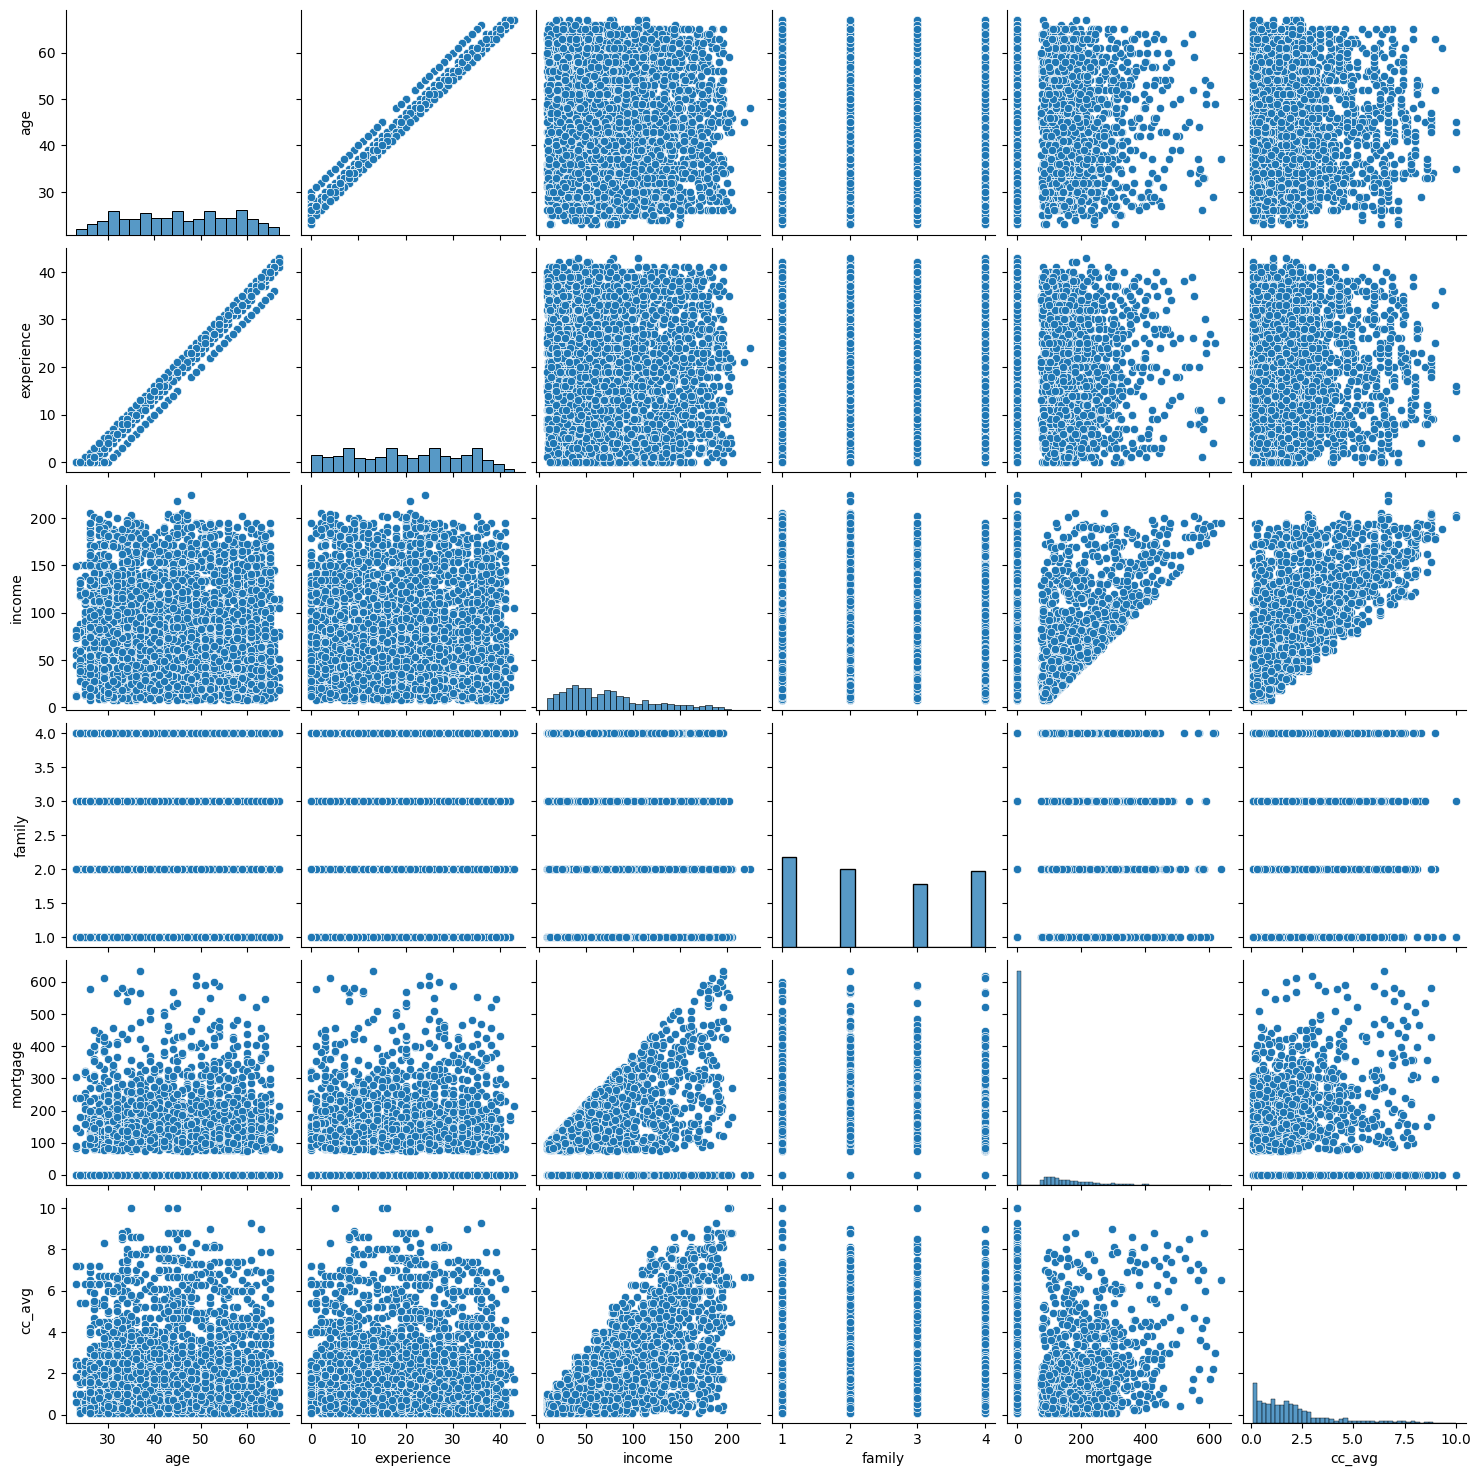

In [87]:
sns.pairplot(data=df_numerical)

<Axes: xlabel='age', ylabel='experience'>

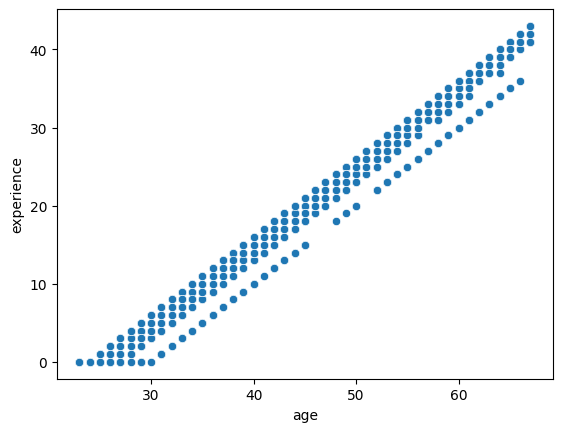

In [88]:
sns.scatterplot(x=df_numerical['age'], y=df_numerical['experience'])

In [89]:
df[['age']].describe()

,age
count,4894.000000
mean,45.333265
std,11.474275
min,23.000000
25%,35.000000
50%,45.000000
75%,55.000000
max,67.000000


In [90]:
a = df_numerical['age'].max() - df_numerical['age'].min()
print('Range: {}'.format(a))

Range: 44


Observações:

1. Há linearidade entre as colunas 'age' e 'experience'.
2. Na coluna 'age', a amplitude(44) está próxima da média(45). 



In [91]:
df_categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4894 entries, 0 to 4893
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age_bracket_name    4894 non-null   object
 1   personal_loan       4894 non-null   int64 
 2   education_degree    4894 non-null   object
 3   securities_account  4894 non-null   int64 
 4   cd_account          4894 non-null   int64 
 5   online              4894 non-null   int64 
 6   credit_card         4894 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 267.8+ KB


In [92]:
df_categorical

,age_bracket_name,personal_loan,education_degree,securities_account,cd_account,online,credit_card
0,Generation Z,0,high school,1,0,0,0
1,Generation X,0,high school,1,0,0,0
2,Millennials,0,high school,0,0,0,0
3,Millennials,0,college,0,0,0,0
4,Millennials,0,college,0,0,0,1
...,...,...,...,...,...,...,...
4889,Millennials,0,postgraduate,0,0,1,0
4890,Millennials,0,high school,0,0,1,0
4891,Baby boomers,0,postgraduate,0,0,0,0
4892,Baby boomers,0,college,0,0,1,0


In [106]:
df_categorical['securities_account'].value_counts(normalize=True)

securities_account
0    0.895586
1    0.104414
Name: proportion, dtype: float64

In [107]:
df_categorical['cd_account'].value_counts(normalize=True)

cd_account
0    0.9387
1    0.0613
Name: proportion, dtype: float64

In [109]:
cat_features_list = df_categorical.columns.tolist()
cat_features = [cat_features_list[0], cat_features_list[2]]
num_features = df_numerical.columns.tolist()[:-1]
print(cat_features_list)
print(cat_features)
print(num_features)

['age_bracket_name', 'personal_loan', 'education_degree', 'securities_account', 'cd_account', 'online', 'credit_card']
['age_bracket_name', 'education_degree']
['age', 'experience', 'income', 'family', 'mortgage']


### Preprocess

In [123]:
# ainda há dúvidas sobre StandardScaler em variaveis numericas.

cat_features_list = df_categorical.columns.tolist()
cat_features = [cat_features_list[0], cat_features_list[3]]
num_features = df_numerical.columns.tolist()[:-1]
scaler = StandardScaler()
encoder = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', encoder, cat_features),
        ('num', scaler, num_features)
    ]
)

X_preprocessed = preprocessor.fit_transform(df)

In [124]:
cat_columns = preprocessor.named_transformers_['cat'].get_feature_names_out()
column_names = num_features + list(cat_columns)
df_preprocessed = pd.DataFrame(X_preprocessed, columns=column_names)

In [125]:
df_preprocessed

,age,experience,income,family,mortgage,age_bracket_name_Baby boomers,age_bracket_name_Generation X,age_bracket_name_Generation Z,age_bracket_name_Millennials,securities_account_0,securities_account_1
0,0.0,0.0,1.0,0.0,0.0,1.0,-1.772255,-1.669049,-0.536152,1.387752,-0.556267
1,0.0,1.0,0.0,0.0,0.0,1.0,-0.029048,-0.096453,-0.861952,0.517473,-0.556267
2,0.0,0.0,0.0,1.0,1.0,0.0,-0.552010,-0.445919,-1.361512,-1.223086,-0.556267
3,0.0,0.0,0.0,1.0,1.0,0.0,-0.900651,-0.970117,0.571568,-1.223086,-0.556267
4,0.0,0.0,0.0,1.0,1.0,0.0,-0.900651,-1.057484,-0.623032,1.387752,-0.556267
...,...,...,...,...,...,...,...,...,...,...,...
4889,0.0,0.0,0.0,1.0,1.0,0.0,-1.423614,-1.494316,-0.731632,-1.223086,-0.556267
4890,0.0,0.0,0.0,1.0,1.0,0.0,-1.336453,-1.406950,-1.274632,1.387752,0.278364
4891,1.0,0.0,0.0,0.0,1.0,0.0,1.539839,1.650876,-1.079152,-0.352806,-0.556267
4892,1.0,0.0,0.0,0.0,1.0,0.0,1.714160,1.738242,-0.536152,0.517473,-0.556267
